In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':2000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Equities","Domestic'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 60)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-02 to 2019-07-01 - 86'

In [21]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 6) & (stat['21-shrp'] > 0.6)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PGX,21,1.083169,0.255608,3.585583,0.582894
SPLV,21,3.522489,1.145884,2.928589,2.660443
USMV,21,3.779888,1.393812,2.592331,1.936934
PFF,21,1.262855,0.445029,2.463185,0.754917
MTUM,21,4.138636,2.265894,1.752937,2.757652
VIG,21,2.934158,2.617638,1.057248,4.381940
NOBL,21,2.735681,2.707646,0.948800,5.389307
XMLV,21,1.454464,1.579327,0.815409,3.688597
DGRO,21,2.142740,2.887998,0.684236,5.720286


In [28]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['PGX'] -2.4690036966892794 0.8 0.11657883883222667 3.585582535521506
['PGX', 'SPLV'] -2.539787193344022 0.3929650060069265 0.32433372038911046 3.2570859197400592


['PGX', 'SPLV']

In [31]:
quote.setup_mask(['PGX', 'SPLV'])
quote.find_optimal_ratio(21)

({'PGX': 0.88, 'SPLV': 0.12}, 1.3813, 0.3076, 3.9481)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,21.0,1.375362,0.306411,0.611131,1.214024,1.324129,1.628351,1.918824,3.944685,0.599159
PGX,21.0,1.083169,0.255608,0.584441,0.932998,1.069305,1.275265,1.587307,3.585583,0.582894
SPLV,21.0,3.522489,1.145884,0.709695,3.206919,3.658218,4.339692,4.955302,2.928589,2.660443


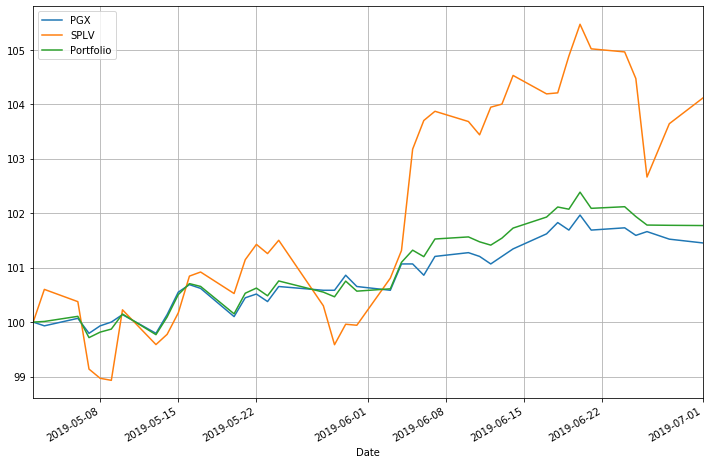

In [32]:
%pylab inline
quote.setup_mask(['PGX', 'SPLV'])
quote.graph(21, {'PGX': 0.88, 'SPLV': 0.12})